In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
import itertools
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [66]:
trainfakenews_file = "./data/trainfakenewsdata.csv"

In [67]:
trainfakenews_df = pd.read_csv(trainfakenews_file)
trainfakenews_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [68]:
trainfakenews_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [69]:
trainfakenews_df = trainfakenews_df.dropna()

In [70]:
# Set `y` 
y = trainfakenews_df.label 

# Drop the `label` column
trainfakenews_df.drop("label", axis=1)

# Set 'x'
X = trainfakenews_df['text']

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)

In [71]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [72]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 96.13%
Confusion matrix


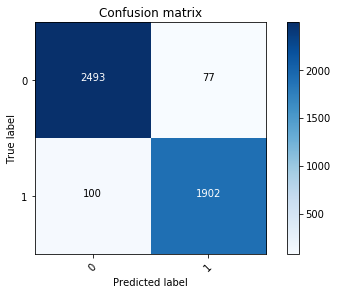

In [74]:
#Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 76.36%
Confusion matrix


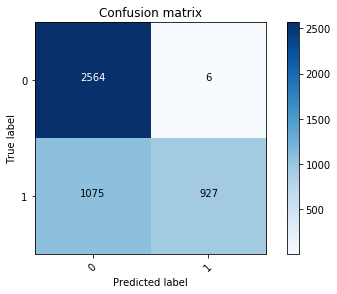

In [76]:
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 90.92%
Confusion matrix


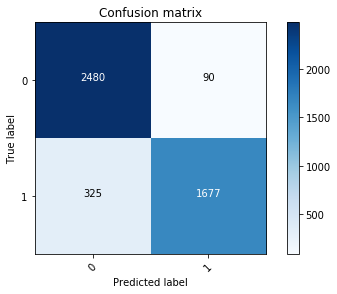

In [78]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])


Accuracy: 96.08%
Confusion matrix


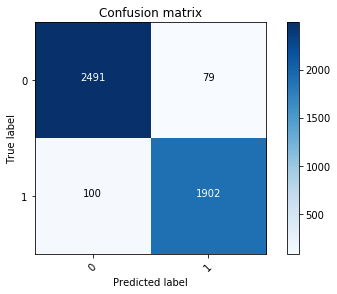

In [80]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [82]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88386
Alpha: 0.10 Score: 0.90332
Alpha: 0.20 Score: 0.88408
Alpha: 0.30 Score: 0.86461
Alpha: 0.40 Score: 0.84449
Alpha: 0.50 Score: 0.82874
Alpha: 0.60 Score: 0.81409
Alpha: 0.70 Score: 0.80009
Alpha: 0.80 Score: 0.78718
Alpha: 0.90 Score: 0.77472


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 96.06%
Confusion matrix


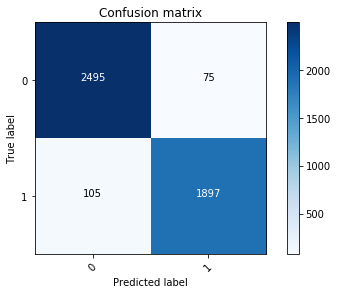

In [83]:
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
y_logpred = logreg.predict(tfidf_test)

score = metrics.accuracy_score(y_test, y_logpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_logpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

Accuracy: 89.92%
Confusion matrix


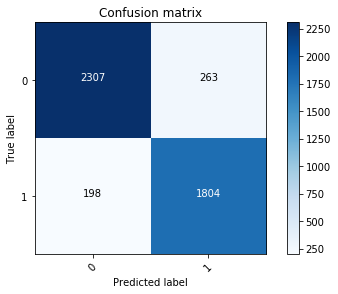

In [84]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(tfidf_train, y_train)
y_adabpred = Adab.predict(tfidf_test)

score = metrics.accuracy_score(y_test, y_adabpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_adabpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [94]:
pipelog = Pipeline([('tf', TfidfVectorizer()),('log', LogisticRegression())])
#pipelog.fit(X_train, y_train)

In [95]:
pipepassive = Pipeline([('tf', TfidfVectorizer()),('pac', PassiveAggressiveClassifier())])
#pipepassive.fit(X_train, y_train)

In [100]:
log_param = {
    'log__C': [11],
    "tf__max_features": [10600]
}

pac_param = {
    'pac__C': [11],
    "tf__max_features": [10600]
}

In [101]:
gridlog = GridSearchCV(pipelog, log_param, verbose=2, n_jobs= -1)
gridpac = GridSearchCV(pipepassive, pac_param, verbose=2, n_jobs= -1)

In [102]:
gridlog.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.4s finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [103]:
gridpac.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [104]:
gridlog.best_params_

{'log__C': 11, 'tf__max_features': 10600}

In [105]:
gridpac.best_params_

{'pac__C': 11, 'tf__max_features': 10600}

In [106]:
best_log = gridlog.best_estimator_
y_best_log= best_log.predict(X_test)

best_score = metrics.accuracy_score(y_test, y_best_log)
print(f'Accuracy: {round(best_score*100,2)}%')

Accuracy: 95.93%


In [107]:
best_pac = gridpac.best_estimator_
y_best_pac = best_pac.predict(X_test)

best_score = metrics.accuracy_score(y_test, y_best_pac)
print(f'Accuracy: {round(best_score*100,2)}%')

Accuracy: 95.76%
